In [1]:
import os
from glob import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
import datetime as dt

## Prerequisites: Merekam Video
> Ajaklah teman / keluarga anda untuk membantu dalam proses perekaman ini

1. Rekamlah sebuah video yang berdurasi kira-kira 60 detik dengan kamera ponsel. Toleransi durasi adalah 63 detik.
2. Resolusi video haruslah tepat 1920x1080 dengan FPS 30.
3. Gunakan tripod / phone holder agar video tetap stabil
4. Lihat contoh gambar untuk posisi framing yang benar

<img src="data/sample_toby.jpg" alt="Contoh Framing" style="width:30%;">

5. Pastikan merekam dalam kondisi pencahayaan yang cukup (cahaya alami matahari lebih disarankan)
6. Anda harus duduk dengan tegak dan bersandar di kursi dan berada di tengah frame. Letakkan kedua tangan di atas lutut anda.
7. Selama perekaman, mintalah teman / keluarga anda untuk menghitung berapa kali anda bernafas selama 60 detik. Bukan hanya sekedar menghitung, teman / keluarga anda harus mencatat pada detik keberapa anda mulai menghembuskan nafas. Oleh karena itu, pastikan teman / keluarga anda menggunakan stopwatch pada HP mereka. (Tekan `LAP` setiap kali anda mulai menghembuskan nafas).
8. Pindahkan catatan tersebut ke dalam `csv` dengan format sebagai berikut:


```markdown
| Nafas-ke | Second | Milisecond |
|----------|--------|-----------|
| 1        | 0      | 0         |
| 2        | 10     | 0         |
```

9. Di detik ke 30, gerakkan kepala anda (menghadap ke kanan dan kiri) hanya satu kali saja

## Image vs Video

### Membuat video dari gambar (image sequence)

Definisikan lokasi direktori dari gambar yang akan dijadikan video.

In [2]:
IMGS_PATH = (os.path.join(os.getcwd(), 'data', 'toby-rgb'))
list_imgs = glob(IMGS_PATH + '/*.jpg')
print(f"5 path pertama: {list_imgs[:5]}")

5 path pertama: ['/Users/martinmanullang/Developer/if4021-handson/data/toby-rgb/1724_20230130_092547_475115.jpg', '/Users/martinmanullang/Developer/if4021-handson/data/toby-rgb/446_20230130_092504_883054.jpg', '/Users/martinmanullang/Developer/if4021-handson/data/toby-rgb/507_20230130_092506_915114.jpg', '/Users/martinmanullang/Developer/if4021-handson/data/toby-rgb/1682_20230130_092546_083114.jpg', '/Users/martinmanullang/Developer/if4021-handson/data/toby-rgb/1783_20230130_092549_451324.jpg']


Jangan lupa, jika bekerja dengan image sequence, pastikan urutan nama file sudah sesuai. Bila perlu, lakukan sorting

In [3]:
list_imgs = sorted(list_imgs, key=lambda x: int(x.split('/')[-1].split('.')[0]))
print(f"5 path pertama setelah diurutkan: {list_imgs[:5]}")
print(f"Total jumlah gambar: {len(list_imgs)}")

5 path pertama setelah diurutkan: ['/Users/martinmanullang/Developer/if4021-handson/data/toby-rgb/0_20230130_092450_022080.jpg', '/Users/martinmanullang/Developer/if4021-handson/data/toby-rgb/1_20230130_092450_051002.jpg', '/Users/martinmanullang/Developer/if4021-handson/data/toby-rgb/2_20230130_092450_083041.jpg', '/Users/martinmanullang/Developer/if4021-handson/data/toby-rgb/3_20230130_092450_115060.jpg', '/Users/martinmanullang/Developer/if4021-handson/data/toby-rgb/4_20230130_092450_147023.jpg']
Total jumlah gambar: 1800


---
**Tugas Hands-on 3**
1. Jelaskan maksud dari `list_imgs = sorted(list_imgs, key=lambda x: int(x.split('/')[-1].split('.')[0]))`
---

Memuat semua gambar yang ada di dalam `list_imgs` ke dalam numpy array. Setiap gambar akan diubah menjadi array 3 dimensi (RGB).

In [4]:
images = []
for img_path in list_imgs:
    img = cv2.imread(img_path)
    images.append(img)

images_array = np.array(images)

print(f"Shape of images_array: {images_array.shape}")

Shape of images_array: (1800, 1080, 1920, 3)


Dapat kita amati bahwa ukuran dari `images_array` adalah berformat `(jumlah gambar, tinggi, lebar, channel)` atau umumnya ditulis `(t, h, w, c)`

Sekarang, mari kita buat sebuah video dari image sequence yang telah kita muat ke dalam `images_array`.

> Warning!
> Mungkin komputer Anda akan kehabisan memori jika jumlah gambar yang dijadikan video terlalu banyak. Jika hal ini terjadi, Anda bisa mengurangi jumlah gambar yang dijadikan video atau menggunakan komputer dengan spesifikasi yang lebih tinggi.

In [5]:
save_loc = os.path.join(os.getcwd(), 'data', 'toby-rgb.mp4')
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
height, width, layers = images_array[0].shape
video = cv2.VideoWriter(save_loc, fourcc, 30, (width, height))

for image in images_array:
    video.write(image)

video.release()

---
**Tugas Hands-on 3**

2. Jelaskan tentang bagian kode berikut:
    ```python
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    ```

    Apakah ada opsi lain selain `mp4v`? Jika ada, coba gunakan dan jelaskan.

---
### Menyimpan setiap frame pada video menjadi gambar

Setelah anda berhasil membuat video dari image sequence, sekarang kita akan mencoba menyimpan setiap frame pada video menjadi gambar.
Pada eksperimen anda sendiri di rumah, mungkin anda perlu menjalankan bagian ini terlebih dahulu apabila sumber data anda adalah video dan anda belum memiliki image sequence.

In [6]:
VID_PATH = os.path.join(os.getcwd(), 'data', 'toby-rgb.mp4')
IMGSEQ_PATH = os.path.join(os.getcwd(), 'data', 'toby-rgb-imgseq')

if not os.path.exists(IMGSEQ_PATH):
    os.makedirs(IMGSEQ_PATH)

cap = cv2.VideoCapture(VID_PATH)
frame_count = 0

while frame_count < 100:
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imwrite(os.path.join(IMGSEQ_PATH, f'frame_{frame_count:03d}.jpg'), frame)
    frame_count += 1

cap.release()
print("100 frame pertama berhasil disimpan.")

100 frame pertama berhasil disimpan.


---
**Tugas Hands-on 3**

3. Membuat video dengan FPS yang lebih rendah.
    - Dengan menggunakan video, simpanlah frame gambar setiap 3 frame. Begini ilustrasinya, jika ada frame 1 s/d 30, maka anda hanya perlu menyimpan frame 1, 4, 7, 10, 13, 16, 19, 22, 25, 28.
    - Dengan analogi ini, artinya anda mengurangi FPS-nya. Berapakah FPS yang baru?
    - Untuk setiap gambar, convertlah ke dalam format grayscale dan resize menjadi 1280 x 720.
    - Untuk setiap gambar, berikanlah titik merah (ukuran bebas, namun terlihat ketika video diputar). Titik tersebut bergerak dari kiri ke kanan untuk setiap frame. Titik tersebut harus sampai di ujung kanan gambar pada frame terakhir. Anda harus melakukan ini secara manual dengan memanipulasi matriks (tidak boleh pakai fungsi / library yang sudah ada)
    - Ingat, karena ini titik merah, maka channel warna pada video anda haruslah RGB (walaupun gambarnya telah menjadi grayscale).
    - Save video tersebut dengan nama `video_low_fps.mp4`
---

## Deteksi Wajah dengan dlib

### Instalasi dlib

Silahkan lihat [panduan ini](instalasi_dlib.md)

### Memindahkan data video ke dalam numpy array

Pertama-tama kita akan memindahkan data video ke dalam numpy array. Kita akan menggunakan `cv2.VideoCapture` untuk membaca video.

In [7]:
VID_PATH = os.path.join(os.getcwd(), 'data', 'toby-rgb.mp4')

cap = cv2.VideoCapture(VID_PATH)
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)

frames_array = np.array(frames)
cap.release()

print(f"Shape of frames_array: {frames_array.shape}")

Shape of frames_array: (1800, 1080, 1920, 3)


Ambil satu gambar sebagai contoh

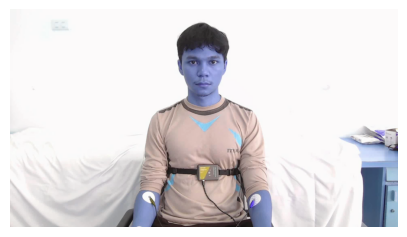

In [8]:
single_img = frames_array[0].copy()
plt.figure(figsize=(5, 5))
plt.imshow(single_img)
plt.axis('off')
plt.show()

Tampaknya kita perlu mengubah warna gambar dari BGR menjadi RGB.

In [9]:
frames_array_rgb = np.array([cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) for frame in frames_array])
print(f"Shape of frames_array_rgb: {frames_array_rgb.shape}")

Shape of frames_array_rgb: (1800, 1080, 1920, 3)


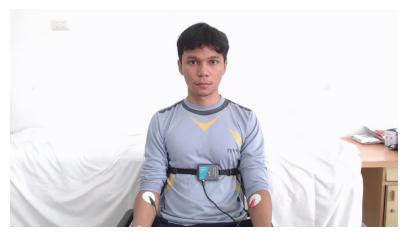

In [10]:
single_img = frames_array_rgb[1].copy()
plt.figure(figsize=(5, 5))
plt.imshow(single_img)
plt.axis('off')
plt.show()

Deteksi dengan dlib

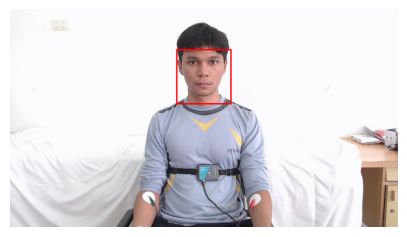

In [11]:
detector = dlib.get_frontal_face_detector()

faces = detector(single_img, 1)
for i, face in enumerate(faces): # untuk setiap wajah yang terdeteksi (bisa saja lebih dari satu)
    x, y, w, h = face.left(), face.top(), face.width(), face.height()
    x2 = x + w
    y2 = y + h
    cv2.rectangle(single_img, (x, y), (x2, y2), (255, 0, 0), 5)

plt.figure(figsize=(5, 5))
plt.imshow(single_img)
plt.axis('off')
plt.show()

```python
faces = detector(single_img, 1)
```
- **`detector(single_img, 1)`**: Ini menggunakan `dlib` face detector (`detector`), yang akan mendeteksi wajah pada gambar `single_img`.
  - `single_img`: Ini adalah gambar input yang ingin dideteksi wajahnya.
  - `1`: Ini adalah parameter opsional yang menentukan jumlah piramida gambar yang digunakan oleh algoritma deteksi wajah. Nilai `1` berarti algoritma akan menggunakan piramida untuk mencari wajah dalam berbagai ukuran.
- **`faces`**: Variabel ini menyimpan hasil deteksi wajah. Ini adalah sebuah list yang berisi objek bounding box untuk setiap wajah yang ditemukan pada gambar. Jika ada lebih dari satu wajah, `faces` akan berisi beberapa item.

```python
for i, face in enumerate(faces):
```
- **`for i, face in enumerate(faces)`**: Ini adalah loop yang akan berjalan sebanyak jumlah wajah yang terdeteksi.
  - **`enumerate(faces)`**: `enumerate` memberikan dua nilai untuk setiap iterasi loop: 
    - `i`: Indeks dari wajah yang terdeteksi (dimulai dari 0).
    - `face`: Objek bounding box dari setiap wajah yang terdeteksi. Objek ini memiliki koordinat posisi wajah dalam gambar.

```python
x, y, w, h = face.left(), face.top(), face.width(), face.height()
```
- **`face.left()`**: Mengambil koordinat x dari tepi kiri kotak pembatas (bounding box) wajah.
- **`face.top()`**: Mengambil koordinat y dari tepi atas kotak pembatas wajah.
- **`face.width()`**: Mengambil lebar bounding box wajah.
- **`face.height()`**: Mengambil tinggi bounding box wajah.
- **`x, y, w, h`**: Variabel ini menyimpan posisi dan ukuran dari bounding box wajah yang terdeteksi, di mana:
  - `x`: Koordinat x dari sudut kiri atas wajah.
  - `y`: Koordinat y dari sudut kiri atas wajah.
  - `w`: Lebar bounding box wajah.
  - `h`: Tinggi bounding box wajah.

```python
x2 = x + w
```
- **`x2 = x + w`**: Menghitung koordinat x dari sudut kanan bawah bounding box. Ini didapat dengan menjumlahkan nilai `x` (koordinat kiri atas) dengan `w` (lebar bounding box).

```python
y2 = y + h
```
- **`y2 = y + h`**: Menghitung koordinat y dari sudut kanan bawah bounding box. Ini didapat dengan menjumlahkan nilai `y` (koordinat kiri atas) dengan `h` (tinggi bounding box).

```python
cv2.rectangle(single_img, (x, y), (x2, y2), (255, 0, 0), 5)
```
- **`cv2.rectangle(single_img, (x, y), (x2, y2), (255, 0, 0), 5)`**:
  - Ini menggunakan OpenCV (`cv2`) untuk menggambar kotak persegi panjang (bounding box) di sekitar wajah yang terdeteksi.
  - **`single_img`**: Gambar tempat kotak akan digambar.
  - **`(x, y)`**: Titik sudut kiri atas dari bounding box (posisi awal persegi).
  - **`(x2, y2)`**: Titik sudut kanan bawah dari bounding box (posisi akhir persegi).
  - **`(255, 0, 0)`**: Warna persegi panjang dalam format BGR (Biru, Hijau, Merah), di mana (255, 0, 0) berarti biru.
  - **`5`**: Ketebalan garis persegi panjang.

Jadi, baris ini menggambar kotak biru dengan ketebalan garis 5 pixel di sekitar wajah yang terdeteksi pada gambar.

Bagian rambut dari subject tidak tercover oleh bounding box, bagaimana menyesuaikannya? Yang perlu diubah adalah `y` dan `h`.

x,y,w,h: (825, 201, 268, 268)
x,y_edit,w,h_edit: (825, 100, 268, 402)


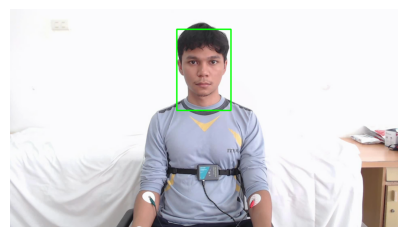

In [12]:
single_img = frames_array_rgb[1].copy()
faces = detector(single_img, 1)
for i, face in enumerate(faces): # untuk setiap wajah yang terdeteksi (bisa saja lebih dari satu)
    x, y, w, h = face.left(), face.top(), face.width(), face.height()
    print(f"x,y,w,h: {x, y, w, h}")
    
    y_edit = int(y - (0.5 * y))
    h_edit = int(h + (0.5 * h))
    print(f"x,y_edit,w,h_edit: {x, y_edit, w, h_edit}")
    
    cv2.rectangle(single_img, (x, y_edit), (x2, y_edit + h_edit), (0, 255, 0), 5)

plt.figure(figsize=(5, 5))
plt.imshow(single_img)
plt.axis('off')
plt.show()

---
**Tugas Hands-on 3**

4. Berdasarkan ROI Wajah, sesuaikanlah ROI tersebut untuk menyeleksi area bahu hingga dada.
---

### Mendeteksi Wajah pada Video

In [13]:
VID_PATH = os.path.join(os.getcwd(), 'data', 'toby-rgb.mp4')
OUTPUT_PATH = os.path.join(os.getcwd(), 'data', 'toby-rgb-roi.mp4')
detector = dlib.get_frontal_face_detector()

cap = cv2.VideoCapture(VID_PATH)
fps = 30

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for mp4
out = cv2.VideoWriter(OUTPUT_PATH, fourcc, fps, (frame_width, frame_height))

total_frame_diproses = fps * 5 # 5 detik
frame_count = 0

start_time = dt.datetime.now()

while frame_count < total_frame_diproses:
    ret, frame = cap.read()
    if not ret:
        break
    
    ### PROSES SETIAP FRAME DISINI ###
    faces = detector(frame, 1)
    for i, face in enumerate(faces): # untuk setiap wajah yang terdeteksi (bisa saja lebih dari satu)
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
    ### AKHIR DARI PEMROSESAN TIAP FRAME ###
    
    # cv2.imshow('Video', frame) # dikarenakan bug di MacOS, saya tidak menampilkan window videonya
    out.write(frame)
    
    frame_count += 1
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

print(f"Waktu yang diperlukan: {dt.datetime.now() - start_time}")

Waktu yang diperlukan: 0:01:36.628192


## Facial Tracking

Dapat anda lihat, bahwa waktu yang dibutuhkan untuk mendeteksi wajah pada setiap frame sangatlah lama. Hal ini disebabkan oleh algoritma yang digunakan oleh `dlib` yang cukup kompleks.

**Lalu bagaimana cara agar proses ini lebih cepat?**

Salah satu cara yang dapat dilakukan adalah dengan menggunakan `facial tracking`. Facial tracking adalah teknik yang digunakan untuk melacak wajah seseorang pada video. Dengan menggunakan facial tracking, kita dapat mengidentifikasi wajah seseorang pada setiap frame video tanpa perlu mendeteksi ulang wajah pada setiap frame.

In [14]:
VID_PATH = os.path.join(os.getcwd(), 'data', 'toby-rgb.mp4')
OUTPUT_PATH = os.path.join(os.getcwd(), 'data', 'toby-rgb-roi-tracking.mp4')
detector = dlib.get_frontal_face_detector()

cap = cv2.VideoCapture(VID_PATH)
fps = 30

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for mp4
out = cv2.VideoWriter(OUTPUT_PATH, fourcc, fps, (frame_width, frame_height))

total_frame_diproses = fps * 10  # 10 seconds
frame_count = 0

start_time = dt.datetime.now()

face_detected = False
p0 = None  # Initial points for tracking
lk_params = dict(winSize=(50, 50), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Variables to periodically re-detect the face
detection_interval = fps * 3  # Re-detect the face every 3 seconds
detection_countdown = detection_interval

while frame_count < total_frame_diproses:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if frame_count == 0 or detection_countdown == 0:  # First frame or re-detection
        faces = detector(gray, 1)
        if faces:
            # Take the first detected face
            face = faces[0]
            x, y, w, h = face.left(), face.top(), face.width(), face.height()
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

            # Get the initial tracking points
            face_roi = gray[y:y + h, x:x + w]
            p0 = cv2.goodFeaturesToTrack(face_roi, mask=None, maxCorners=10, qualityLevel=0.8, minDistance=10, blockSize=10)
            if p0 is not None:
                p0[:, :, 0] += x
                p0[:, :, 1] += y

            face_detected = True
            detection_countdown = detection_interval  # Reset countdown for re-detection
    else:  # Track the face in subsequent frames
        if face_detected and p0 is not None:
            # Perform optical flow tracking
            p1, st, err = cv2.calcOpticalFlowPyrLK(prev_gray, gray, p0, None, **lk_params)
            good_new = p1[st == 1]
            good_old = p0[st == 1]

            # Calculate the shift using median to avoid outliers
            if len(good_new) > 0:
                x_shift = np.median(good_new[:, 0] - good_old[:, 0])
                y_shift = np.median(good_new[:, 1] - good_old[:, 1])

                x = int(x + x_shift)
                y = int(y + y_shift)

                # Ensure the bounding box remains within the frame boundaries
                x = max(0, min(x, frame_width - w))
                y = max(0, min(y, frame_height - h))

                # Draw the rectangle around the tracked face
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

            # Update the tracking points
            p0 = good_new.reshape(-1, 1, 2)

    # Write the processed frame to the output
    out.write(frame)

    # Update the previous frame for optical flow in the next iteration
    prev_gray = gray.copy()

    frame_count += 1
    detection_countdown -= 1  # Decrease countdown for re-detection
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Waktu yang diperlukan: {dt.datetime.now() - start_time}")


Waktu yang diperlukan: 0:00:16.059812


```python
VID_PATH = os.path.join(os.getcwd(), 'data', 'toby-rgb.mp4')
OUTPUT_PATH = os.path.join(os.getcwd(), 'data', 'toby-rgb-roi-tracking.mp4')
detector = dlib.get_frontal_face_detector()
```

- **VID_PATH** dan **OUTPUT_PATH** adalah jalur file input dan output untuk video.
- **detector** adalah objek deteksi wajah dari **dlib** yang digunakan untuk mendeteksi wajah pada frame pertama atau saat re-detection.

```python
cap = cv2.VideoCapture(VID_PATH)
fps = 30

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec untuk mp4
out = cv2.VideoWriter(OUTPUT_PATH, fourcc, fps, (frame_width, frame_height))
```

- **cap** digunakan untuk membuka file video dan **fps** diset ke 30 frame per detik.
- **frame_width** dan **frame_height** digunakan untuk mendapatkan lebar dan tinggi frame dari video input.
- **fourcc** adalah kode kompresi yang digunakan untuk menyimpan video dalam format mp4.
- **out** adalah objek untuk menulis hasil video yang sudah diproses ke jalur output yang telah ditentukan.

```python
total_frame_diproses = fps * 10  # 10 detik
frame_count = 0

start_time = dt.datetime.now()

face_detected = False
p0 = None  # Titik awal untuk tracking
lk_params = dict(winSize=(50, 50), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
```

- **total_frame_diproses** menentukan jumlah total frame yang akan diproses (10 detik).
- **frame_count** adalah penghitung untuk melacak jumlah frame yang telah diproses.
- **start_time** digunakan untuk mengukur waktu eksekusi keseluruhan.
- **face_detected** adalah flag untuk menunjukkan apakah wajah telah terdeteksi atau tidak.
- **p0** adalah array yang akan menyimpan titik-titik awal untuk **tracking**.
- **lk_params** adalah parameter untuk algoritma Lucas-Kanade optical flow, termasuk ukuran jendela (**winSize**), tingkat piramida maksimum (**maxLevel**), dan kriteria penghentian (**criteria**).

```python
detection_interval = fps * 3  # Re-detect wajah setiap 3 detik
detection_countdown = detection_interval
```

- **detection_interval** menentukan interval untuk mendeteksi ulang wajah (setiap 3 detik).
- **detection_countdown** digunakan sebagai penghitung waktu mundur untuk mengetahui kapan waktunya untuk melakukan re-detection.

```python
while frame_count < total_frame_diproses:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
```

- **while loop** digunakan untuk memproses setiap frame dalam video.
- **ret** menunjukkan apakah frame berhasil dibaca.
- **frame** adalah gambar dari frame yang sedang diproses.
- **gray** mengubah gambar menjadi grayscale untuk mempermudah pemrosesan selanjutnya.

```python
    if frame_count == 0 or detection_countdown == 0:  # Frame pertama atau re-detection
        faces = detector(gray, 1)
        if faces:
            # Ambil wajah pertama yang terdeteksi
            face = faces[0]
            x, y, w, h = face.left(), face.top(), face.width(), face.height()
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

            # Ambil titik awal untuk tracking
            face_roi = gray[y:y + h, x:x + w]
            p0 = cv2.goodFeaturesToTrack(face_roi, mask=None, maxCorners=10, qualityLevel=0.8, minDistance=10, blockSize=10)
            if p0 is not None:
                p0[:, :, 0] += x
                p0[:, :, 1] += y

            face_detected = True
            detection_countdown = detection_interval  # Reset countdown untuk re-detection
```

- Pada frame pertama atau setelah **detection_countdown** mencapai 0, wajah akan dideteksi ulang.
- **detector** mendeteksi wajah pada frame dan mengambil wajah pertama yang terdeteksi.
- Koordinat wajah disimpan dalam variabel **x**, **y**, **w**, dan **h**.
- **cv2.rectangle** menggambar kotak di sekitar wajah yang terdeteksi.
- **face_roi** digunakan untuk menentukan wilayah wajah yang akan diambil fitur-fiturnya.
- **cv2.goodFeaturesToTrack** menemukan titik-titik fitur yang baik untuk digunakan dalam tracking.
- **p0** diperbarui untuk menyimpan koordinat asli dari titik-titik tersebut.
- **face_detected** diatur ke **True** untuk menandai bahwa wajah telah berhasil dideteksi.
- **detection_countdown** di-reset kembali ke **detection_interval**.

```python
    else:  # Tracking wajah pada frame berikutnya
        if face_detected and p0 is not None:
            # Lakukan tracking menggunakan optical flow
            p1, st, err = cv2.calcOpticalFlowPyrLK(prev_gray, gray, p0, None, **lk_params)
            good_new = p1[st == 1]
            good_old = p0[st == 1]

            # Hitung pergeseran menggunakan median untuk menghindari outliers
            if len(good_new) > 0:
                x_shift = np.median(good_new[:, 0] - good_old[:, 0])
                y_shift = np.median(good_new[:, 1] - good_old[:, 1])

                x = int(x + x_shift)
                y = int(y + y_shift)

                # Pastikan kotak tetap berada dalam batas frame
                x = max(0, min(x, frame_width - w))
                y = max(0, min(y, frame_height - h))

                # Gambar kotak di sekitar wajah yang ter-tracking
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

            # Update titik untuk tracking selanjutnya
            p0 = good_new.reshape(-1, 1, 2)
```

- Pada frame berikutnya, **tracking** dilakukan menggunakan **cv2.calcOpticalFlowPyrLK**.
- **p1** menyimpan posisi baru titik-titik yang ter-tracking.
- **good_new** dan **good_old** menyimpan titik-titik yang berhasil di-tracking.
- Pergeseran dihitung menggunakan median dari perubahan koordinat untuk menghindari outlier.
- **x** dan **y** diperbarui berdasarkan pergeseran yang terhitung.
- Posisi kotak dicek agar tetap berada dalam batas frame.
- **cv2.rectangle** menggambar kotak di lokasi baru yang sudah di-update.

```python
    # Tulis frame yang sudah diproses ke output
    out.write(frame)

    # Update frame sebelumnya untuk optical flow
    prev_gray = gray.copy()

    frame_count += 1
    detection_countdown -= 1  # Kurangi countdown untuk re-detection
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
```

- Frame yang telah diproses ditulis ke video output.
- **prev_gray** diperbarui untuk menyimpan frame saat ini sebagai frame referensi untuk optical flow pada iterasi berikutnya.
- **frame_count** ditingkatkan untuk menghitung jumlah frame yang telah diproses.
- **detection_countdown** dikurangi untuk mendekati re-detection.
- Jika tombol 'q' ditekan, loop akan berhenti.

```python
cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Waktu yang diperlukan: {dt.datetime.now() - start_time}")
```

- Setelah semua frame selesai diproses, **cap** dan **out** dilepaskan.
- **cv2.destroyAllWindows()** digunakan untuk menutup semua jendela yang dibuat oleh OpenCV.
- Waktu total yang diperlukan untuk memproses ditampilkan. 

---
**Tugas Hands-on 3**

5. Dengan menggunakan video anda, lakukan facial tracking pada detik ke 25 - 40. Berikan bounding box pada wajah yang terdeteksi. Simpan video tersebut di google drive, link-nya cantumkan pada jawaban anda.
    - Lakukan strategi terbaik untuk mengatur ROI agar wajah tetap terdeteksi pada setiap frame.
    - Anda dapat menyesuaikan waktu deteksi (berapa detik sekali deteksi dengan dlib dilakukan)
    - Anda dapat menyesuaikan parameter deteksi wajah dengan dlib dan parameter tracking dengan OpenCV

Tugas Hands-on 3:

Nomor 6
- Tempelkan sebuah .png pada wajah anda (bisa di landmark lain, selain mata)
- Modifikasi kode di atas agar lebih smooth
    Tips:   - Lakukan deteksi landmark tidak di setiap frame, melainkan setiap beberapa frame
            - Misal. Deteksi landmark hanya dilakukan per setiap detik (atau 30 frame sekali)

### Ketentuan Penamaan File
```
nim_ho3.ipynb
```

### Pengumpulan
- Unggah `.ipynb` ke repositori anda.
- Paste link dari file ke google form pengumpulan tugas
- Export `.ipynb` menjadi `.pdf` dan unggah juga ke google form

Link yang di paste harus mirip dengan format berikut:
```
https://github.com/<username>/<kode_mk>/blob/master/<nim_ho3>.ipynb
```

- *Pastikan repo anda bersifat privat dan anda telah mengundang dosen pengampu ke repositori anda*
- Seluruh tugas untuk ho1 digabung dalam satu file notebook `.ipynb`
- Berikan penjelasan yang sedetail-detailnya untuk setiap bagian eksperimen yang anda lakukan



---
## Catatan
- Dikarenakan banyak file yang berukuran besar seperti video dan gambar, tampaknya beberapa orang akan mengalami kendala ketika mensinkronkan dengan github
- Oleh karena itu, file video dan gambar tidak wajib diupload ke github. Anda dapat melakukan upload ke google drive dan memuatnya di Jupyter Notebook. Anda dapat menggunakan library `gdown`. [Cek tutorial berikut](https://www.youtube.com/watch?v=tKM95YWBc0o&t=630s).